<a href="https://colab.research.google.com/github/fbparis/floot/blob/main/floot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 11.4MB/s 


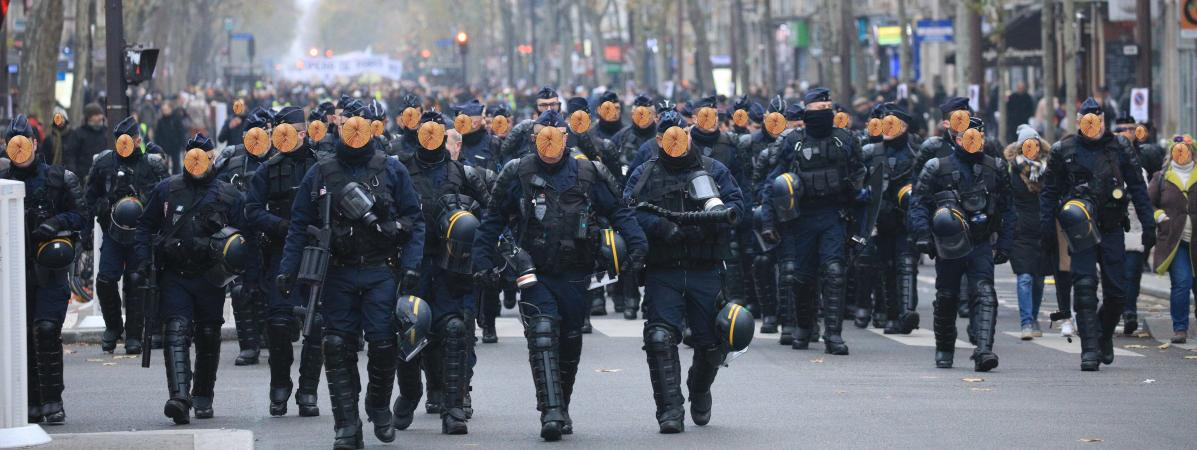

In [11]:
import cv2
import mtcnn
import numpy as np
from google.colab.patches import cv2_imshow


def blend_transparent(face_img, overlay_t_img):
    # Split out the transparency mask from the colour info
    overlay_img = overlay_t_img[:,:,:3] # Grab the BRG planes
    overlay_mask = overlay_t_img[:,:,3:]  # And the alpha plane

    # Again calculate the inverse mask
    background_mask = 255 - overlay_mask

    # Turn the masks into three channel, so we can use them as weights
    overlay_mask = cv2.cvtColor(overlay_mask, cv2.COLOR_GRAY2BGR)
    background_mask = cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR)

    # Create a masked out face image, and masked out overlay
    # We convert the images to floating point in range 0.0 - 1.0
    face_part = (face_img * (1 / 255.0)) * (background_mask * (1 / 255.0))
    overlay_part = (overlay_img * (1 / 255.0)) * (overlay_mask * (1 / 255.0))

    # And finally just add them together, and rescale it back to an 8bit integer image    
    return np.uint8(cv2.addWeighted(face_part, 255.0, overlay_part, 255.0, 0.0))


img = cv2.imread('flics.jpg')
anus = cv2.imread('anus.png', cv2.IMREAD_UNCHANGED)
face_detector = mtcnn.MTCNN()

conf_t = 0.70

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = face_detector.detect_faces(img_rgb)

for res in results:
	if res['confidence'] < conf_t:
		continue
	x, y, width, height = res['box']
	mask = cv2.resize(anus, (width, height), interpolation = cv2.INTER_AREA)
	# mask = cv2.addWeighted(img[y:y + height, x:x + width], 0.5, mask, 0.5, 0)
	img[y:y + height, x:x + width] = blend_transparent(img[y:y + height, x:x + width], mask)

cv2_imshow(img)
